In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("customers (1).csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [4]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

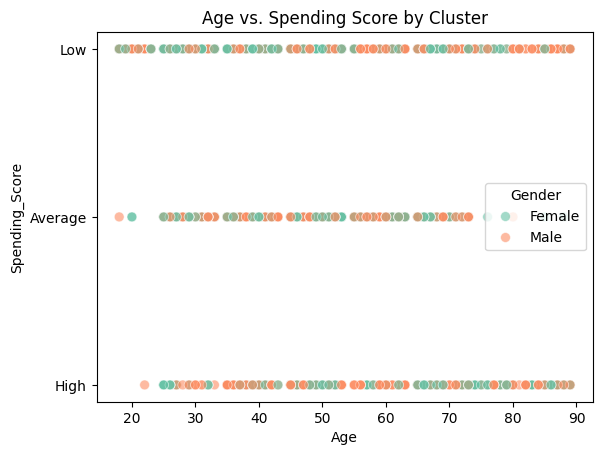

In [5]:
sns.scatterplot(data=df, x='Age', y='Spending_Score', hue='Gender', palette='Set2', s=50, alpha=0.6)
plt.title('Age vs. Spending Score by Cluster')
plt.show()

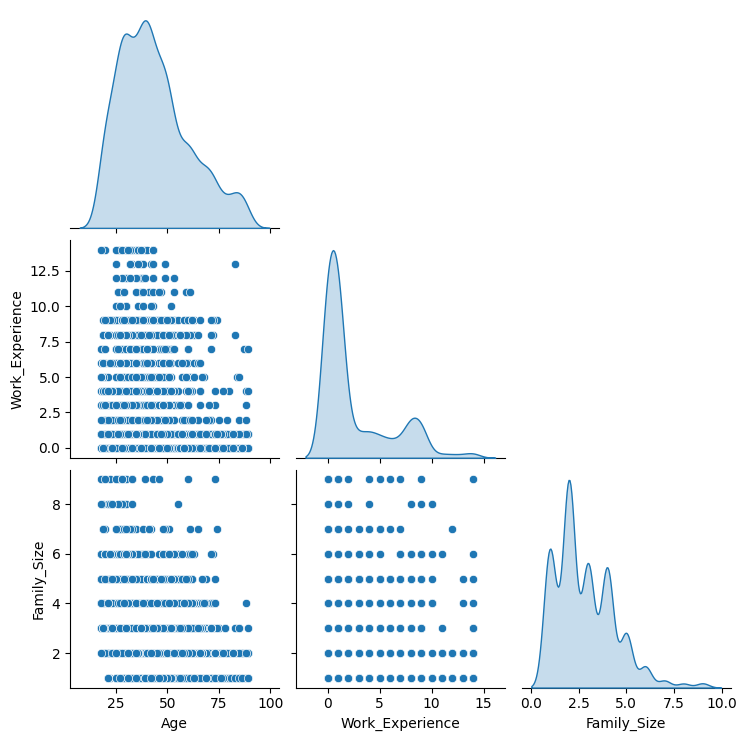

In [6]:
sns.pairplot(df[['Age','Work_Experience','Family_Size','Spending_Score']],
              diag_kind='kde', corner=True)
plt.show()

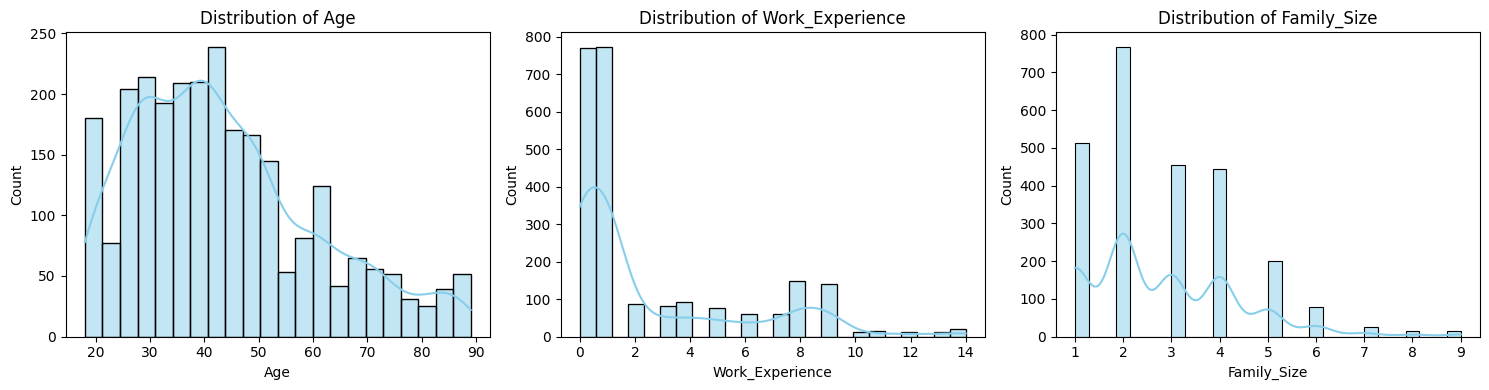

In [7]:
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5*len(numeric_cols), 4))
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20352\141341429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_20352\141341429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_20352\141341429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_20352\141341429.py:4: FutureWarning: 

Passing `

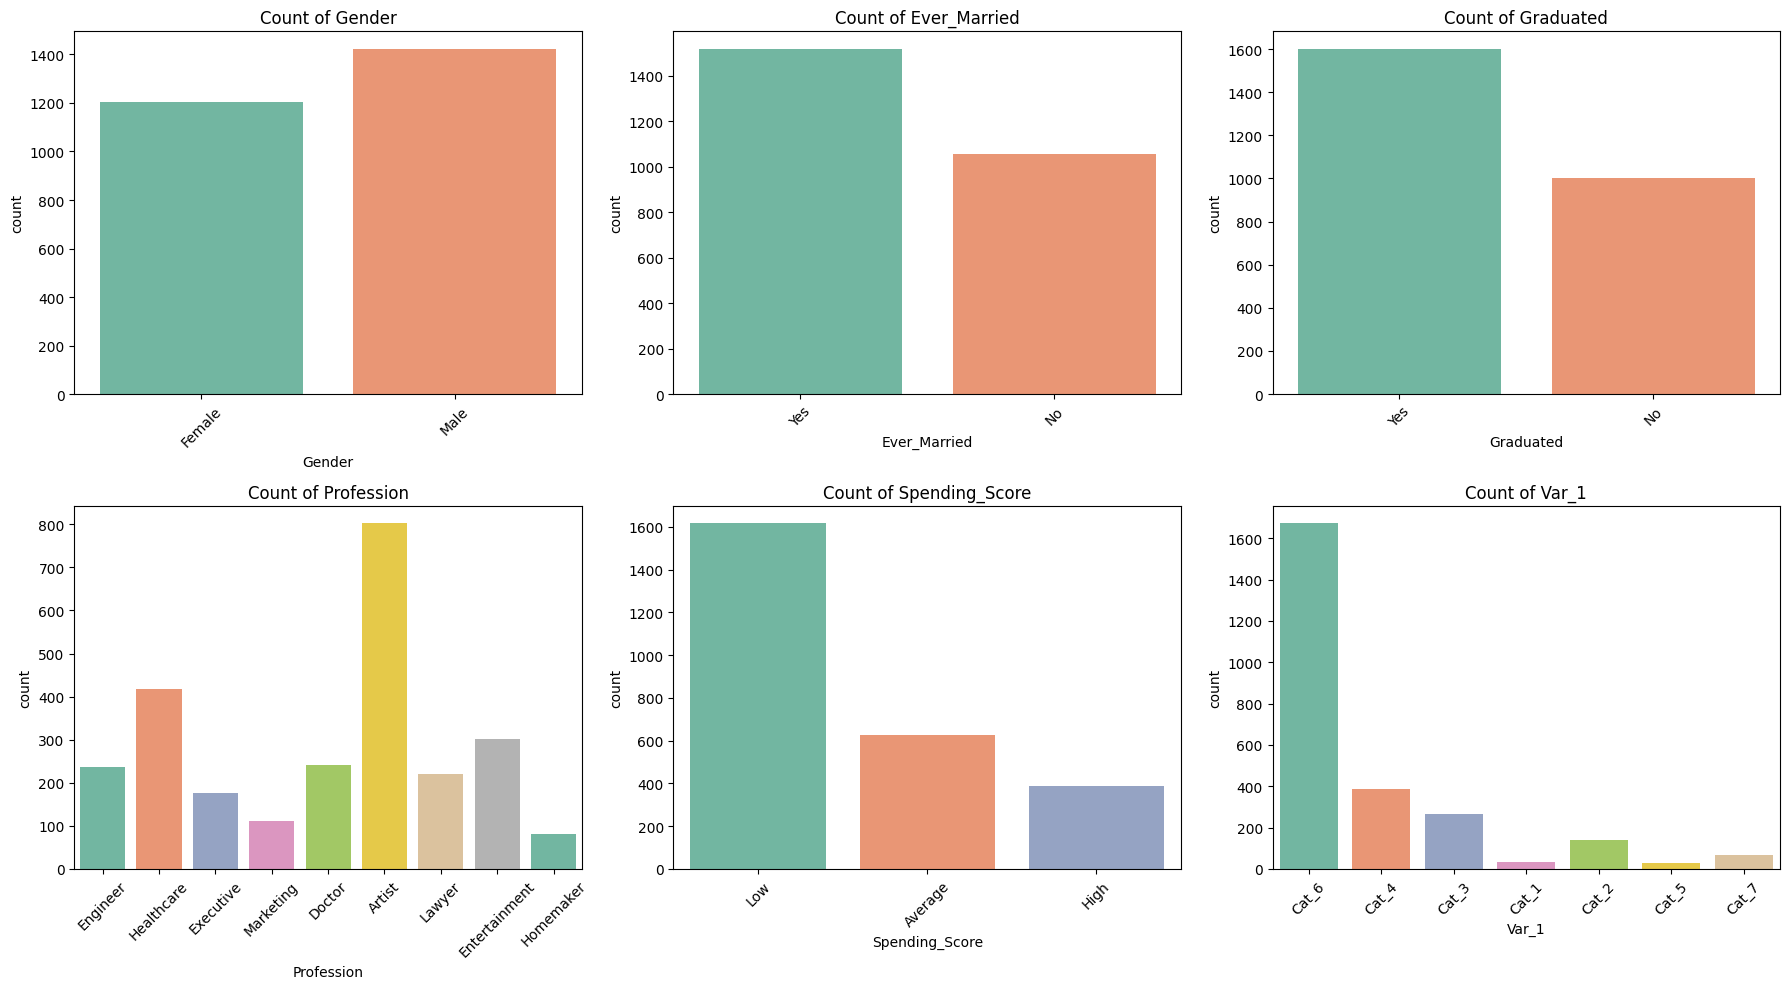

In [8]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(data=df, x=col, ax=ax, palette='Set2')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

In [9]:
numeric_cols = ['Age', 'Work_Experience', 'Family_Size']
X_num = df[numeric_cols]

In [17]:
df[['Age', 'Family_Size']].isnull().sum()
import numpy as np
np.isinf(df[['Age', 'Family_Size']]).sum()

Age            0
Family_Size    0
dtype: int64

In [43]:
df_clean = df[['Age', 'Family_Size']].dropna()

In [44]:
imputer = SimpleImputer(strategy='mean')  # or 'median'
df[['Age', 'Family_Size']] = imputer.fit_transform(df[['Age', 'Family_Size']])

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

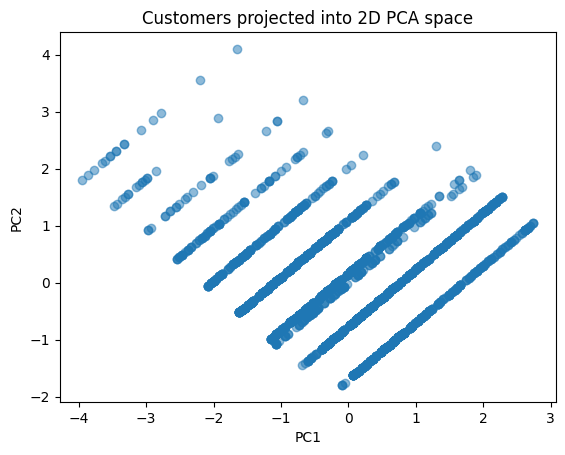

In [46]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('Customers projected into 2D PCA space')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()

Text(0, 0.5, 'Work_Experience')

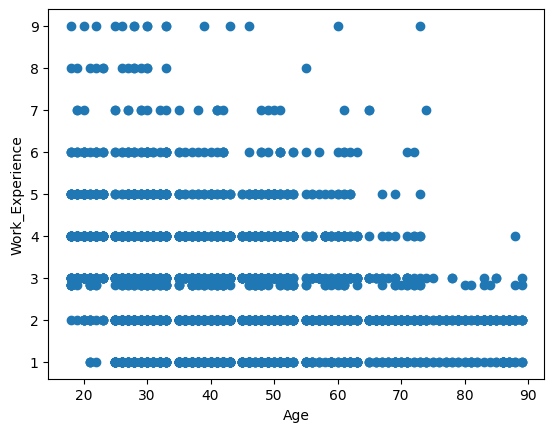

In [47]:
plt.scatter(df['Age'],df['Family_Size'])
plt.xlabel('Age')
plt.ylabel('Work_Experience')

In [48]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Family_Size']])
    sse.append(km.inertia_)

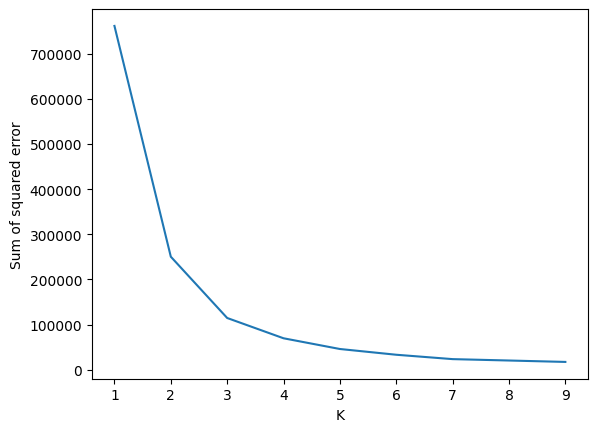

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [50]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Family_Size']])
y_predicted

array([2, 2, 0, ..., 2, 2, 2], dtype=int32)

In [51]:
df['cluster']=y_predicted
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,cluster
0,458989,Female,Yes,36.0,Yes,Engineer,0.0,Low,1.0,Cat_6,2
1,458994,Male,Yes,37.0,Yes,Healthcare,8.0,Average,4.0,Cat_6,2
2,458996,Female,Yes,69.0,No,NaN,0.0,Low,1.0,Cat_6,0
3,459000,Male,Yes,59.0,No,Executive,11.0,High,2.0,Cat_6,0
4,459001,Female,No,19.0,No,Marketing,NaN,Low,4.0,Cat_6,1


In [52]:
km.cluster_centers_

array([[70.43333333,  2.28668346],
       [27.05324814,  3.36524748],
       [44.62630662,  2.6371875 ]])

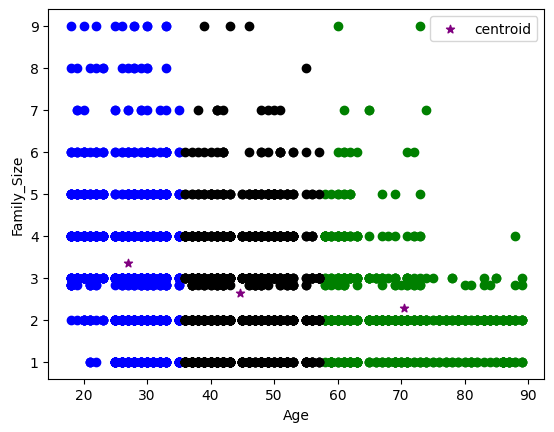

In [53]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Family_Size'],color='green')
plt.scatter(df2['Age'],df2['Family_Size'],color='blue')
plt.scatter(df3['Age'],df3['Family_Size'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.legend()